## S3 0218 2014 flare modelling redone
The purpose is to reproduce this plot from the paper
https://ui.adsabs.harvard.edu/abs/2016A%26A...595A..98A/abstract

<img src="figures/b0218_sed.png" style="float: left;" width="500"/>

Caption: Broadband SED of QSO B0218+357 modeled with a two-zone model. The reconstructed fluxes (red squares) are corrected for different magnifications in different energy ranges (see the text). Historical measurements (ASDC7) are shown with green circles and triangles (flux upper limit). Gray curves depict the emission from the region located within the BLR, while orange curves refer to the region located beyond the BLR. Long dashed curves show the synchrotron radiation, dotted the SSC emission and short dashed the external Compton emission. Dashed-dotted light blue line represents the accretion disk emission and its X-ray corona. The solid black line shows the sum of the non-thermal emission from both regions.

Table of parameters:
<img src="figures/b0218_pars.png" style="float: left;" width="800"/>

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
# import agnpy classes
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.compton import ExternalCompton, SynchrotronSelfCompton
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus

In [2]:
# matplotlib adjustments and axes labels
plt.rc("figure", figsize=(7.5, 5.5))
plt.rc("font", size=12)
plt.rc("axes", grid=True)
plt.rc("grid", ls=":")
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

In [3]:
# S3 0218 detection paper settings
# blob in
spectrum_norm = 1.5e5 * u.Unit("cm-3")
parameters_in = {
    "p1": 2.0,
    "p2": 3.9,
    "gamma_b": 300.,
    "gamma_min": 2.5,
    "gamma_max": 3.e4,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_in}
R_b = 7e15 * u.cm
B = 1.1 * u.G
z = 0.94
delta_D = 20
Gamma = 17

blob_in = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict, spectrum_norm_type="gamma=1")
blob_in.set_gamma_size(500)
print(f"total number {blob_in.N_e_tot:.2e}")
print(f"total energy {blob_in.W_e:.2e}")

dist_in=7e16 * u.cm # location of the emission region

#blob out
spectrum_norm = 3e7 * u.Unit("cm-3")
parameters_out = {
    "p1": 2.0,
    "p2": 4.3,
    "gamma_b": 7.e4,
    "gamma_min": 1.e3,
    "gamma_max": 2.e5,
}

spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_out}
R_b = 1e15 * u.cm
B = 0.03 * u.G
blob_out = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict, spectrum_norm_type="gamma=1")
blob_out.set_gamma_size(500)
print(f"total number {blob_out.N_e_tot:.2e}")
print(f"total energy {blob_out.W_e:.2e}")

dist_out=2e17 * u.cm # location of the emission region

normalising broken power-law to value 1.50e+05 1 / cm3 at gamma = 1, and  1.67e+00 1 / cm3 at gamma_b = 3.00e+02
total number 8.57e+52
total energy 9.38e+47 erg
normalising broken power-law to value 3.00e+07 1 / cm3 at gamma = 1, and  6.12e-03 1 / cm3 at gamma_b = 7.00e+04
total number 1.24e+50
total energy 4.78e+47 erg


In [4]:
print(blob_in)
print(blob_out)

* spherical emission region
 - R_b (radius of the blob): 7.00e+15 cm
 - V_b (volume of the blob): 1.44e+48 cm3
 - z (source redshift): 0.94
 - d_L (source luminosity distance):1.94e+28 cm
 - delta_D (blob Doppler factor): 2.00e+01
 - Gamma (blob Lorentz factor): 1.70e+01
 - Beta (blob relativistic velocity): 9.98e-01
 - theta_s (jet viewing angle): 2.82e+00 deg
 - B (magnetic field tangled to the jet): 1.10e+00 G
* electron spectrum
 - broken power law
 - k_e: 1.67e+00 1 / cm3
 - p1: 2.00
 - p2: 3.90
 - gamma_b: 3.00e+02
 - gamma_min: 2.50e+00
 - gamma_max: 3.00e+04

* spherical emission region
 - R_b (radius of the blob): 1.00e+15 cm
 - V_b (volume of the blob): 4.19e+45 cm3
 - z (source redshift): 0.94
 - d_L (source luminosity distance):1.94e+28 cm
 - delta_D (blob Doppler factor): 2.00e+01
 - Gamma (blob Lorentz factor): 1.70e+01
 - Beta (blob relativistic velocity): 9.98e-01
 - theta_s (jet viewing angle): 2.82e+00 deg
 - B (magnetic field tangled to the jet): 3.00e-02 G
* electro

In [5]:
# synchrotron
synch_in = Synchrotron(blob_in, ssa=True)
synch_out = Synchrotron(blob_out, ssa=True)
# let us define now a grid of frequencies over which to calculate the synchrotron SED
nu_syn = np.logspace(8, 23) * u.Hz
# let us compute synchrotron SED
synch_sed_in = synch_in.sed_flux(nu_syn) 
synch_sed_out = synch_out.sed_flux(nu_syn) 

../../agnpy/synchrotron.py:94: RuntimeWarning: divide by zero encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
../../agnpy/synchrotron.py:94: RuntimeWarning: invalid value encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)


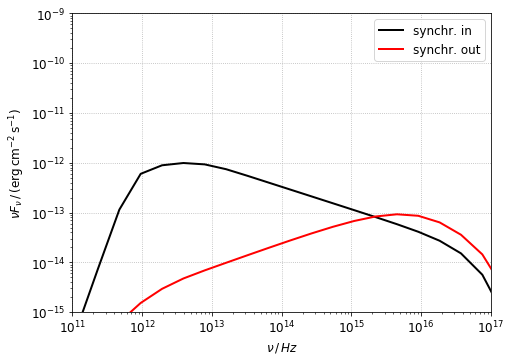

In [9]:
# synchrotron part seem to be reproduced very nicely
plt.loglog(nu_syn, synch_sed_in, color="k", lw=2, label="synchr. in")
plt.loglog(nu_syn, synch_sed_out, color="r", lw=2, label="synchr. out")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-15, 1e-9)
plt.xlim(1e11, 1e17)
plt.legend()
plt.show()

In [12]:
### EC starts here, first the disk, luminosity of 6 x 10^44 is taken from the paper, 
L_disk = 6 * 1e44 * u.Unit("erg s-1")

#epsilon_line = 2e-5 #Ly alpha, not sure what Fabrizio used in his code, but it should not matter much
#print(epsilon_line*511.e3*u.Unit("eV"))
xi_line = 0.1  # it is not explicitely mentioned in the paper, but Fabrizio normally uses 10% for BLR
R_line = 7.7e16 * u.cm # value from the paper
blr = SphericalShellBLR(L_disk, xi_line, "Lyalpha", R_line)

In [13]:
# define the array of frequencies over which to calculate the SED 
nu = np.logspace(15, 30) * u.Hz
ec_blr_in = ExternalCompton(blob_in, blr, r=dist_in)
ec_blr_in_sed = ec_blr_in.sed_flux(nu)
ec_blr_out = ExternalCompton(blob_out, blr, r=dist_out)
ec_blr_out_sed = ec_blr_out.sed_flux(nu)

In [14]:
# here define the DT
T_dt = 1e3 * u.K
xi_dt = 0.6
# distance taken from the paper
dt = RingDustTorus(L_disk, xi_dt, T_dt, R_dt=2.e18*u.cm)

In [15]:
ec_dt_in = ExternalCompton(blob_in, dt, dist_in)
ec_dt_out = ExternalCompton(blob_out, dt, dist_out)
# compute the SEDs
ec_dt_in_sed = ec_dt_in.sed_flux(nu)
ec_dt_out_sed = ec_dt_out.sed_flux(nu)

In [16]:
### SSC
# simple ssc
ssc_in = SynchrotronSelfCompton(blob_in, synch_in)
ssc_out = SynchrotronSelfCompton(blob_out, synch_out)
ssc_in_sed = ssc_in.sed_flux(nu)
ssc_out_sed = ssc_out.sed_flux(nu)

../../agnpy/synchrotron.py:94: RuntimeWarning: divide by zero encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
../../agnpy/synchrotron.py:94: RuntimeWarning: invalid value encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
../../agnpy/synchrotron.py:95: RuntimeWarning: overflow encountered in true_divide
  attenuation = 3 * u / tau
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


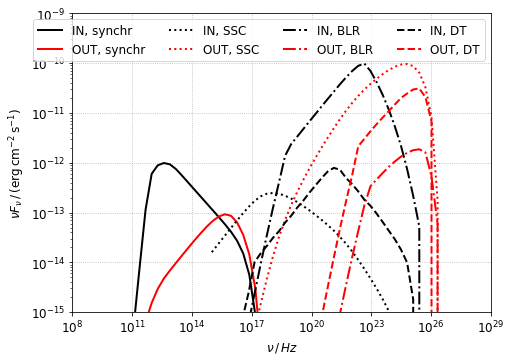

In [17]:
plt.loglog(nu_syn, synch_sed_in, color="k", lw=2, label="IN, synchr")
plt.loglog(nu_syn, synch_sed_out, color="r", lw=2, label="OUT, synchr")

plt.loglog(nu, ssc_in_sed, lw=2, ls=':', color="k", label="IN, SSC")
plt.loglog(nu, ssc_out_sed, lw=2, ls=':', color="r", label="OUT, SSC")

plt.loglog(nu, ec_blr_in_sed, lw=2, ls='-.', color="k", label="IN, BLR")
plt.loglog(nu, ec_blr_out_sed, lw=2, ls='-.', color="r", label="OUT, BLR")

plt.loglog(nu, ec_dt_in_sed,  lw=2, ls='--', color="k", label="IN, DT")
plt.loglog(nu, ec_dt_out_sed, lw=2, ls='--', color="r", label="OUT, DT")

plt.ylim(1e-15, 1e-9)
plt.xlim(1e8, 1e29)
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend(ncol=4)
plt.show()

as written above synchrotron radiation seems fine for both blobs, so I probably did not screw up anything with the parameters

SSC component on the other hand is ~2.5 times higher then in Fabrizio's modelling

with EC it is more difficult to compare, because he stacks up both radiation fields: BLR and DT, plus the radiation field simplifications are somewhat different in both codes.
For IN region BLR is dominant, but the code gives ~factor 10 larger flux compared to Fabrizio's one
For OUT region DT is dominant and the code gives a factor 3 below the Fabrizio's one

### pks 1510 low state
now try with another paper, low state of PKS1510, modelling of "close" emission region

<img src="figures/pks1510_sed.png" style="float: left;" width="500"/>
<img src="figures/pks1510_sed_far.png" style="float: left;" width="500"/>
green - synchr, cyan - SSC, red - EC

<img src="figures/pks1510_pars.png" style="float: left;" width="800"/>

In [19]:
spectrum_norm = 3.e4 * u.Unit("cm-3")
parameters = {
    "p1": 1.9,
    "p2": 3.5,
    "gamma_b": 130.,
    "gamma_min": 2.5,
    "gamma_max": 3.e5,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters}
R_b = 2e16 * u.cm
B = 0.35 * u.G
z = 0.36
delta_D = 25
Gamma = 20
blobclose = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict, spectrum_norm_type="gamma=1")
blobclose.set_gamma_size(500)

distclose=7e17 * u.cm # location of the emission region

spectrum_norm = 80 * u.Unit("cm-3")
parameters = {
    "p1": 1.9,
    "p2": 3.7,
    "gamma_b": 300.,
    "gamma_min": 2,
    "gamma_max": 3.e5,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters}
R_b = 3e17 * u.cm
B = 0.05 * u.G
blobfar = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict, spectrum_norm_type="gamma=1")
blobfar.set_gamma_size(500)

distfar=3e18 * u.cm # location of the emission region

normalising broken power-law to value 3.00e+04 1 / cm3 at gamma = 1, and  2.89e+00 1 / cm3 at gamma_b = 1.30e+02
normalising broken power-law to value 8.00e+01 1 / cm3 at gamma = 1, and  1.57e-03 1 / cm3 at gamma_b = 3.00e+02


../../agnpy/synchrotron.py:94: RuntimeWarning: divide by zero encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
../../agnpy/synchrotron.py:94: RuntimeWarning: invalid value encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)


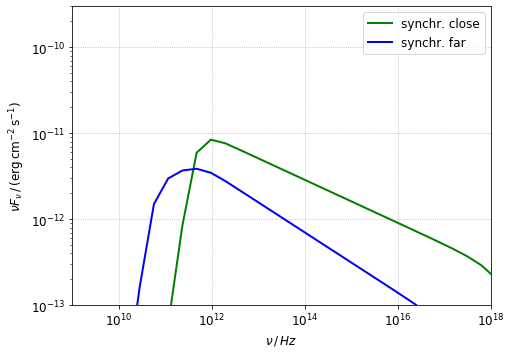

In [21]:
# synchrotron
synch_close = Synchrotron(blobclose, ssa=True)
synch_close_sed = synch_close.sed_flux(nu_syn) 
synch_far = Synchrotron(blobfar, ssa=True)
synch_far_sed = synch_far.sed_flux(nu_syn) 

plt.loglog(nu_syn, synch_close_sed, color="g", lw=2, label="synchr. close")
plt.loglog(nu_syn, synch_far_sed, color="b", lw=2, label="synchr. far")

plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-13, 3e-10)
plt.xlim(1e9, 1e18)
plt.legend()
plt.show()
# all agreeing nicely with the paper

In [23]:
# Disk, BLR and DT parameters from the paper
L_disk1510 = 6.7 * 1e45 * u.Unit("erg s-1")
R_line1510 = 2.6e17 * u.cm # value from the paper 
T_dt=1000 * u.K # value from the paper
blr1510 = SphericalShellBLR(L_disk1510, xi_line, "Lyalpha", R_line1510)
dt1510 = RingDustTorus(L_disk1510, xi_dt, T_dt, R_dt=6.5e18*u.cm) # value from the paper
print(blr1510)
print(dt1510)

* Spherical Shell Broad Line Region:
 - L_disk (accretion disk luminosity): 6.70e+45 erg / s
 - xi_line (fraction of the disk radiation reprocessed by the BLR): 1.00e-01
 - line (type of emitted line): Lyalpha, lambda = 0.00 cm
 - R_line (radius of the BLR shell): 2.60e+17 cm

* Ring Dust Torus:
 - L_disk (accretion disk luminosity): 6.70e+45 erg / s
 - xi_dt (fraction of the disk radiation reprocessed by the torus): 6.00e-01
 - T_dt (temperature of the dust torus): 1.00e+03 K
 - R_dt (radius of the torus): 6.50e+18 cm



In [24]:
# now calculate SSC and EC for "close" scenario
ssc_1510_close = SynchrotronSelfCompton(blobclose, synch_close)
ssc_1510_close_sed = ssc_1510_close.sed_flux(nu)
#ec_blr_1510 = ExternalCompton(blob, blr1510, r=dist)
#ec_blr_1510_sed = ec_blr_1510.sed_flux(nu)
ec_dt_1510_close = ExternalCompton(blobclose, dt1510, distclose)
ec_dt_1510_close_sed = ec_dt_1510_close.sed_flux(nu)

../../agnpy/synchrotron.py:94: RuntimeWarning: divide by zero encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
../../agnpy/synchrotron.py:94: RuntimeWarning: invalid value encountered in true_divide
  u = 1 / 2 + np.exp(-tau) / tau - (1 - np.exp(-tau)) / np.power(tau, 2)
../../agnpy/synchrotron.py:95: RuntimeWarning: overflow encountered in true_divide
  attenuation = 3 * u / tau
/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


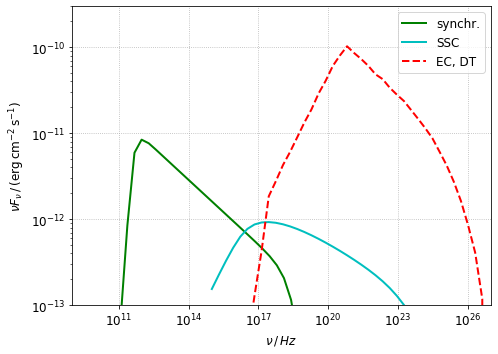

In [26]:
# and plot everything for close scenario
plt.loglog(nu_syn, synch_close_sed, color="g", lw=2, label="synchr.")
plt.loglog(nu, ssc_1510_close_sed, color="c", lw=2, label="SSC")
#plt.loglog(nu, ec_blr_1510_sed, color="r", ls=':', lw=2, label="EC, BLR")
plt.loglog(nu, ec_dt_1510_close_sed, color="r", ls='--', lw=2, label="EC, DT")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-13, 3e-10)
plt.xlim(1e9, 1e27)
plt.legend()
plt.show()

SSC is 60% higher then in Fabrizio's code

EC is a factor of ~2 below Fabrizio's code


In [27]:
# now calculate EC for "far" scenario
ec_dt_1510_far = ExternalCompton(blobfar, dt1510, distfar)
ec_dt_1510_far_sed = ec_dt_1510_far.sed_flux(nu)

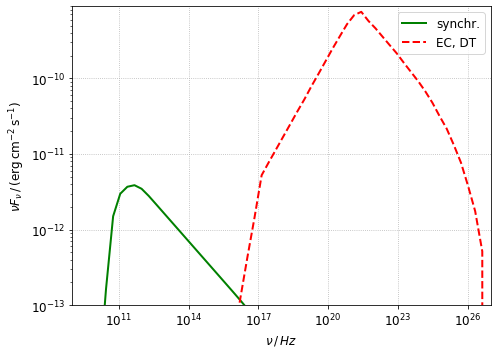

In [29]:
# and plot everything for far scenario
plt.loglog(nu_syn, synch_far_sed, color="g", lw=2, label="synchr.")
plt.loglog(nu, ec_dt_1510_far_sed, color="r", ls='--', lw=2, label="EC, DT")
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.ylim(1e-13, 9e-10)
plt.xlim(1e9, 1e27)
plt.legend()
plt.show()

SSC is 60% higher then in Fabrizio's code

EC is a factor of ~2 above the Fabrizio's code (??)


### backups

In [46]:
# PKS1510-089 2015 flare paper settings
# blob A
spectrum_norm = 4e4 * u.Unit("cm-3")
parameters_in = {
    "p1": 1.9,
    "p2": 3.7,
    "gamma_b": 800.,
    "gamma_min": 200.,
    "gamma_max": 5.e4,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_in}
R_b = 2e16 * u.cm
B = 0.23 * u.G
z = 0.36
delta_D = 25
Gamma = 20
blob_in = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
blob_in.set_gamma_size(500)
print(f"total number {blob_in.N_e_tot:.2e}")
print(f"total energy {blob_in.W_e:.2e}")

#blob B
spectrum_norm = 3e7 * u.Unit("cm-3")
parameters_out = {
    "p1": 2.1,
    "p2": 3.7,
    "gamma_b": 500.,
    "gamma_min": 200.,
    "gamma_max": 4.1e4,
}
spectrum_dict = {"type": "BrokenPowerLaw", "parameters": parameters_out}
B = 0.33 * u.G
blob_out = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)
blob_out.set_gamma_size(500)
print(f"total number {blob_out.N_e_tot:.2e}")
print(f"total energy {blob_out.W_e:.2e}")

normalising broken power-law to total particle density: 4.00e+04 1 / cm3
total number 1.34e+54
total energy 5.28e+50 erg
normalising broken power-law to total particle density: 3.00e+07 1 / cm3
total number 1.01e+57
total energy 3.26e+53 erg


150000.0 1 / cm3
[150000.] 1 / cm3


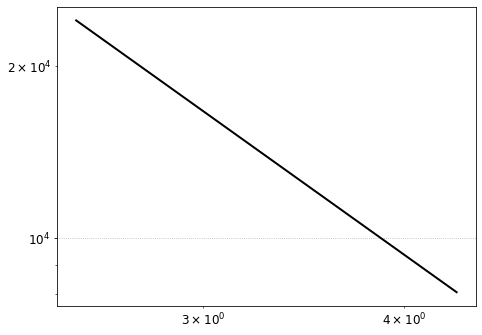

In [14]:
plt.loglog(blob_in.gamma[:30], blob_in.n_e(blob_in.gamma[:30]), color="k", lw=2, label="EED")
print(blob_in.n_e.k_e)
print(blob_in.n_e(blob_in.gamma[0:1]) * 2.5**2)